In [1]:
kegids =["C00002", "C00003", "C00004", "C00005", 
         "C00006", "C00007", "C00008", "C00009", "C00010"]

In [2]:
import urllib
for id in kegids:
   url = "http://www.kegg.jp/dbget-bin/www_bget?-f+m+compound+{0}".format(id)
   fn = "{0}.mol".format(id)
   urllib.urlretrieve(url,"{0}".format(fn))

In [3]:
from rdkit import Chem
ms = [Chem.MolFromMolFile("{0}.mol".format(id)) for id in kegids]

In [4]:
from rdkit.Chem import AllChem
for m in ms: tmp=AllChem.Compute2DCoords(m)

In [5]:
from rdkit.Chem import Draw
Draw.MolToFile(ms[0],'{0}.png'.format(ms[0]))

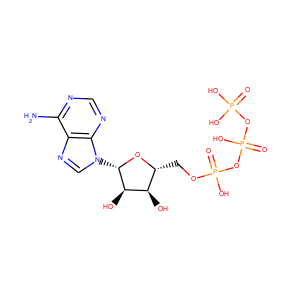

In [6]:
from IPython.display import Image
Image(filename='{0}.png'.format(ms[0]))

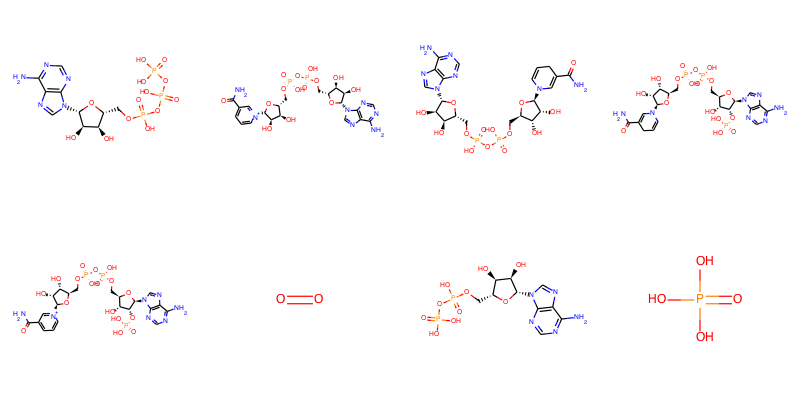

In [7]:
img=Draw.MolsToGridImage(ms[:8],molsPerRow=4,subImgSize=(200,200))
img.save('molgrid.png')
Image(filename="molgrid.png")

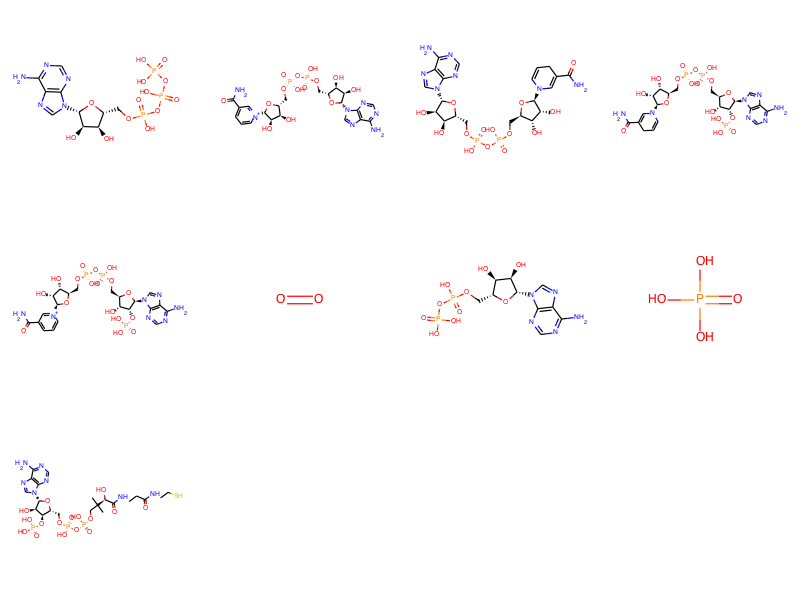

In [8]:
img=Draw.MolsToGridImage(ms,molsPerRow=4,subImgSize=(200,200))
img.save('molgrid.png')
Image(filename="molgrid.png")

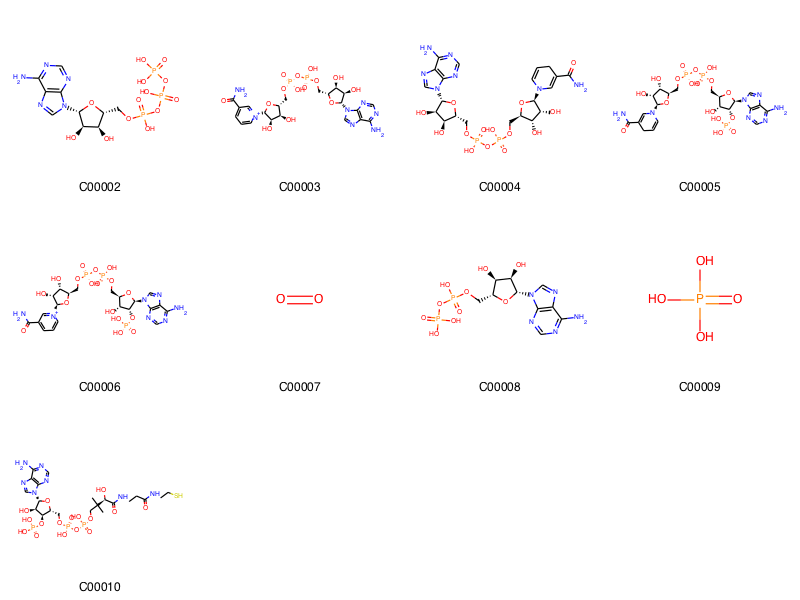

In [9]:
img=Draw.MolsToGridImage(ms,molsPerRow=4,subImgSize=(200,200), legends=kegids)
img.save('molgrid.png')
Image(filename="molgrid.png")

In [10]:
for i, m in enumerate(ms):
   print i, m.HasSubstructMatch(Chem.MolFromSmarts('ncn'))

0 True
1 True
2 True
3 True
4 True
5 False
6 True
7 False
8 True


In [11]:
for id, m in zip(kegids, ms):
   print id, m.HasSubstructMatch(Chem.MolFromSmarts('ncn'))

C00002 True
C00003 True
C00004 True
C00005 True
C00006 True
C00007 False
C00008 True
C00009 False
C00010 True


In [12]:
for id, m in zip(kegids, ms):
    print id
    print " ", Chem.MolToSmiles(m)
    m = AllChem.DeleteSubstructs(m,Chem.MolFromSmarts('ncn'))
    print " ", Chem.MolToSmiles(m)
    print "\n"

C00002
  Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O
  O=P(O)(O)OP(=O)(O)OP(=O)(O)OCC1OCC(O)C1O.ccN


C00003
  NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)c1
  NC(=O)c1ccc[n+](c1)C1OC(COP(=O)(O)OP(=O)(O)OCC2OCC(O)C2O)C(O)C1O.ccN


C00004
  NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)C=CC1
  NC(=O)C1=CN(C=CC1)C1OC(COP(=O)(O)OP(=O)(O)OCC2OCC(O)C2O)C(O)C1O.ccN


C00005
  NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C=CC1
  NC(=O)C1=CN(C=CC1)C1OC(COP(=O)(O)OP(=O)(O)OCC2OCC(OP(=O)(O)O)C2O)C(O)C1O.ccN


C00006
  NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1
  NC(=O)c1ccc[n+](c1)C1OC(COP(=O)(O)OP(=O)(O)OCC2OCC(OP(=O)(O)O)C2O)C(O)C1O.ccN


C00007
  O=O
  O=O


C00008
  Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)O)C(O)C1O
  O=P(O)(O)OP(=O)(O)OCC1OCC(O)C1O.ccN


C00009
  O=P(O)(O)O
  O=P(O)(O)O


C00010
  CC(C)(COP(=O)(O)OP(=O)(O)OCC1OC

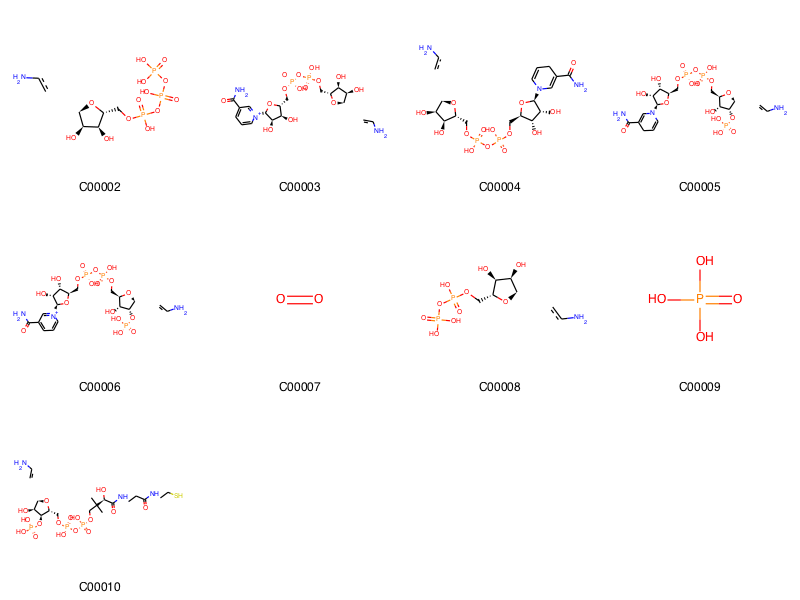

In [13]:
img=Draw.MolsToGridImage(
    [AllChem.DeleteSubstructs(m,Chem.MolFromSmarts('ncn')) for m in ms],
    molsPerRow=4,subImgSize=(200,200), legends=kegids)
img.save('molgrid.png')
Image(filename="molgrid.png")

In [14]:
for id, m in zip(kegids, ms):
    print id
    print " ", Chem.MolToSmiles(m)
    m = AllChem.ReplaceSubstructs(m,
                                  Chem.MolFromSmarts('N'), 
                                  Chem.MolFromSmiles('NC(=O)C'))
    print " ", Chem.MolToSmiles(m[0])
    print "\n"

C00002
  Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O
  CC(=O)Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O


C00003
  NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)c1
  CC(=O)NC(=O)c1ccc[n+](c1)C1OC(COP(=O)(O)OP(=O)(O)OCC2OC(C(O)C2O)n2cnc3c(N)ncnc32)C(O)C1O


C00004
  NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)C=CC1
  CC(=O)Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OCC2OC(C(O)C2O)N2C=CCC(=C2)C(N)=O)C(O)C1O


C00005
  NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C=CC1
  CC(=O)Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OCC2OC(C(O)C2O)N2C=CCC(=C2)C(N)=O)C(O)C1OP(=O)(O)O


C00006
  NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1
  CC(=O)Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OCC2OC(C(O)C2O)[n+]2cccc(c2)C(N)=O)C(O)C1OP(=O)(O)O


C00007
  O=O
  O=O


C00008
  Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)O)C(O)C1O
  CC(=O)Nc1ncnc2c1ncn2C

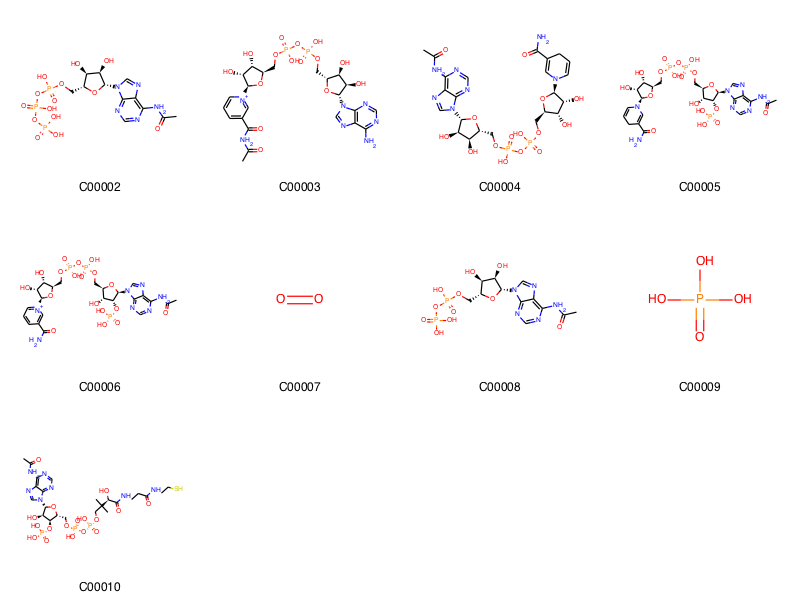

In [15]:
ms2 = []
for id, m in zip(kegids, ms):
    m = AllChem.ReplaceSubstructs(m,
                                  Chem.MolFromSmarts('N'), 
                                  Chem.MolFromSmiles('NC(=O)C'))
    ms2.append(m[0])
for m in ms2: tmp=AllChem.Compute2DCoords(m)
img=Draw.MolsToGridImage(ms2,
                         molsPerRow=4,subImgSize=(200,200), legends=kegids)
img.save('molgrid.png')
Image(filename="molgrid.png")

In [16]:
from rdkit.Chem import rdFMCS
res=rdFMCS.FindMCS(ms)

In [17]:
res.numAtoms

0

In [18]:
res=rdFMCS.FindMCS(ms[:5])

In [19]:
res.numAtoms

27

In [20]:
res.numBonds

29

In [21]:
res.smartsString

'[#7]1(:[#6]2:[#6](:[#6](:[#7]:[#6]:[#7]:2)-[#7]):[#7]:[#6]:1)-[#6]1-[#8]-[#6](-[#6]-[#8]-[#15](-[#8]-[#15](-[#8])(-[#8])=[#8])(-[#8])=[#8])-[#6](-[#6]-1-[#8])-[#8]'

In [22]:
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

In [23]:
#Topological Fingerprints
fps = [FingerprintMols.FingerprintMol(m) for m in ms]
for i in range(1,len(fps)):
    for j in range(i):
       print kegids[i], kegids[j], DataStructs.FingerprintSimilarity(fps[i],fps[j])

C00003 C00002 0.873454545455
C00004 C00002 0.818305084746
C00004 C00003 0.795788130185
C00005 C00002 0.790058862001
C00005 C00003 0.774273345702
C00005 C00004 0.963696369637
C00006 C00002 0.831258644537
C00006 C00003 0.94950911641
C00006 C00004 0.784786641929
C00006 C00005 0.818800247372
C00007 C00002 0.03125
C00007 C00003 0.03125
C00007 C00004 0.03125
C00007 C00005 0.03125
C00007 C00006 0.03125
C00008 C00002 0.97790507365
C00008 C00003 0.882570162482
C00008 C00004 0.818493150685
C00008 C00005 0.788778877888
C00008 C00006 0.838008415147
C00008 C00007 0.03125
C00009 C00002 0.1875
C00009 C00003 0.1875
C00009 C00004 0.1875
C00009 C00005 0.1875
C00009 C00006 0.1875
C00009 C00007 0.0
C00009 C00008 0.1875
C00010 C00002 0.865370770338
C00010 C00003 0.828744123573
C00010 C00004 0.807667731629
C00010 C00005 0.812696417348
C00010 C00006 0.831585845347
C00010 C00007 0.03125
C00010 C00008 0.872899926954
C00010 C00009 0.1875


In [24]:
# MACCS Keys
from rdkit.Chem import MACCSkeys
fps = [MACCSkeys.GenMACCSKeys(m) for m in ms]
for i in range(1,len(fps)):
    for j in range(i):
       print kegids[i], kegids[j], DataStructs.FingerprintSimilarity(fps[i],fps[j])

C00003 C00002 0.930555555556
C00004 C00002 0.893333333333
C00004 C00003 0.933333333333
C00005 C00002 0.906666666667
C00005 C00003 0.921052631579
C00005 C00004 0.986666666667
C00006 C00002 0.944444444444
C00006 C00003 0.986111111111
C00006 C00004 0.921052631579
C00006 C00005 0.934210526316
C00007 C00002 0.0588235294118
C00007 C00003 0.056338028169
C00007 C00004 0.0540540540541
C00007 C00005 0.0533333333333
C00007 C00006 0.0555555555556
C00008 C00002 1.0
C00008 C00003 0.930555555556
C00008 C00004 0.893333333333
C00008 C00005 0.906666666667
C00008 C00006 0.944444444444
C00008 C00007 0.0588235294118
C00009 C00002 0.235294117647
C00009 C00003 0.208333333333
C00009 C00004 0.2
C00009 C00005 0.213333333333
C00009 C00006 0.222222222222
C00009 C00007 0.25
C00009 C00008 0.235294117647
C00010 C00002 0.809523809524
C00010 C00003 0.802325581395
C00010 C00004 0.775280898876
C00010 C00005 0.786516853933
C00010 C00006 0.813953488372
C00010 C00007 0.047619047619
C00010 C00008 0.809523809524
C00010 C0000

In [25]:
#Atom-pair descriptors
from rdkit.Chem.AtomPairs import Pairs
pairFps = [Pairs.GetAtomPairFingerprint(m) for m in ms]
for i in range(1,len(fps)):
    for j in range(i):
       print kegids[i], kegids[j], DataStructs.FingerprintSimilarity(fps[i],fps[j])

C00003 C00002 0.930555555556
C00004 C00002 0.893333333333
C00004 C00003 0.933333333333
C00005 C00002 0.906666666667
C00005 C00003 0.921052631579
C00005 C00004 0.986666666667
C00006 C00002 0.944444444444
C00006 C00003 0.986111111111
C00006 C00004 0.921052631579
C00006 C00005 0.934210526316
C00007 C00002 0.0588235294118
C00007 C00003 0.056338028169
C00007 C00004 0.0540540540541
C00007 C00005 0.0533333333333
C00007 C00006 0.0555555555556
C00008 C00002 1.0
C00008 C00003 0.930555555556
C00008 C00004 0.893333333333
C00008 C00005 0.906666666667
C00008 C00006 0.944444444444
C00008 C00007 0.0588235294118
C00009 C00002 0.235294117647
C00009 C00003 0.208333333333
C00009 C00004 0.2
C00009 C00005 0.213333333333
C00009 C00006 0.222222222222
C00009 C00007 0.25
C00009 C00008 0.235294117647
C00010 C00002 0.809523809524
C00010 C00003 0.802325581395
C00010 C00004 0.775280898876
C00010 C00005 0.786516853933
C00010 C00006 0.813953488372
C00010 C00007 0.047619047619
C00010 C00008 0.809523809524
C00010 C0000

In [26]:
#atom-pair descriptors encoded as a standard bit vector fingerprint
from rdkit.Chem.AtomPairs import Pairs
fps = [Pairs.GetAtomPairFingerprintAsBitVect(m) for m in ms]
for i in range(1,len(fps)):
    for j in range(i):
       print kegids[i], kegids[j], DataStructs.DiceSimilarity(fps[i],fps[j])

C00003 C00002 0.704512372635
C00004 C00002 0.647137150466
C00004 C00003 0.907449209932
C00005 C00002 0.589371980676
C00005 C00003 0.82450674974
C00005 C00004 0.911392405063
C00006 C00002 0.632944228275
C00006 C00003 0.898454746137
C00006 C00004 0.830927835052
C00006 C00005 0.913085004776
C00007 C00002 0.0
C00007 C00003 0.0
C00007 C00004 0.0
C00007 C00005 0.0
C00007 C00006 0.0
C00008 C00002 0.89378757515
C00008 C00003 0.700315457413
C00008 C00004 0.636103151862
C00008 C00005 0.567741935484
C00008 C00006 0.615598885794
C00008 C00007 0.0
C00009 C00002 0.0285714285714
C00009 C00003 0.0144578313253
C00009 C00004 0.0125260960334
C00009 C00005 0.0143884892086
C00009 C00006 0.0160320641283
C00009 C00007 0.0
C00009 C00008 0.0352422907489
C00010 C00002 0.497482376636
C00010 C00003 0.570921985816
C00010 C00004 0.578859060403
C00010 C00005 0.568951930654
C00010 C00006 0.564356435644
C00010 C00007 0.0
C00010 C00008 0.463829787234
C00010 C00009 0.0110957004161


In [27]:
# Topological torsion descriptors
from rdkit.Chem.AtomPairs import Torsions
fps = [Torsions.GetTopologicalTorsionFingerprintAsIntVect(m) for m in ms]
for i in range(1,len(fps)):
    for j in range(i):
       print kegids[i], kegids[j], DataStructs.DiceSimilarity(fps[i],fps[j])

C00003 C00002 0.705128205128
C00004 C00002 0.705128205128
C00004 C00003 0.8
C00005 C00002 0.670807453416
C00005 C00003 0.748717948718
C00005 C00004 0.94358974359
C00006 C00002 0.683229813665
C00006 C00003 0.94358974359
C00006 C00004 0.758974358974
C00006 C00005 0.81
C00007 C00002 0.0
C00007 C00003 0.0
C00007 C00004 0.0
C00007 C00005 0.0
C00007 C00006 0.0
C00008 C00002 0.948275862069
C00008 C00003 0.72
C00008 C00004 0.72
C00008 C00005 0.683870967742
C00008 C00006 0.696774193548
C00008 C00007 0.0
C00009 C00002 0.0
C00009 C00003 0.0
C00009 C00004 0.0
C00009 C00005 0.0
C00009 C00006 0.0
C00009 C00007 0.0
C00009 C00008 0.0
C00010 C00002 0.702702702703
C00010 C00003 0.615384615385
C00010 C00004 0.615384615385
C00010 C00005 0.652406417112
C00010 C00006 0.663101604278
C00010 C00007 0.0
C00010 C00008 0.718309859155
C00010 C00009 0.0


In [28]:
# Morgan Fingerprints (Circular Fingerprints)
fps = [AllChem.GetMorganFingerprint(m,2) for m in ms]
for i in range(1,len(fps)):
    for j in range(i):
       print kegids[i], kegids[j], DataStructs.DiceSimilarity(fps[i],fps[j])

C00003 C00002 0.725490196078
C00004 C00002 0.725490196078
C00004 C00003 0.842975206612
C00005 C00002 0.728971962617
C00005 C00003 0.777777777778
C00005 C00004 0.920634920635
C00006 C00002 0.719626168224
C00006 C00003 0.920634920635
C00006 C00004 0.769841269841
C00006 C00005 0.854961832061
C00007 C00002 0.046511627907
C00007 C00003 0.0322580645161
C00007 C00004 0.0322580645161
C00007 C00005 0.0298507462687
C00007 C00006 0.0298507462687
C00008 C00002 0.935897435897
C00008 C00003 0.711340206186
C00008 C00004 0.711340206186
C00008 C00005 0.686274509804
C00008 C00006 0.676470588235
C00008 C00007 0.0526315789474
C00009 C00002 0.193548387097
C00009 C00003 0.12213740458
C00009 C00004 0.12213740458
C00009 C00005 0.127659574468
C00009 C00006 0.127659574468
C00009 C00007 0.153846153846
C00009 C00008 0.21686746988
C00010 C00002 0.698113207547
C00010 C00003 0.592
C00010 C00004 0.592
C00010 C00005 0.646153846154
C00010 C00006 0.646153846154
C00010 C00007 0.030303030303
C00010 C00008 0.653465346535
C

In [29]:
# Morgan Fingerprints (Circular Fingerprints) as bit vectors
fps = [AllChem.GetMorganFingerprintAsBitVect(m,2,nBits=1024) for m in ms]
for i in range(1,len(fps)):
    for j in range(i):
       print kegids[i], kegids[j], DataStructs.DiceSimilarity(fps[i],fps[j])

C00003 C00002 0.813559322034
C00004 C00002 0.820512820513
C00004 C00003 0.766917293233
C00005 C00002 0.790322580645
C00005 C00003 0.728571428571
C00005 C00004 0.94964028777
C00006 C00002 0.768
C00006 C00003 0.936170212766
C00006 C00004 0.728571428571
C00006 C00005 0.789115646259
C00007 C00002 0.0377358490566
C00007 C00003 0.0289855072464
C00007 C00004 0.0294117647059
C00007 C00005 0.0266666666667
C00007 C00006 0.0263157894737
C00008 C00002 0.990099009901
C00008 C00003 0.803418803419
C00008 C00004 0.810344827586
C00008 C00005 0.780487804878
C00008 C00006 0.758064516129
C00008 C00007 0.0384615384615
C00009 C00002 0.175438596491
C00009 C00003 0.13698630137
C00009 C00004 0.138888888889
C00009 C00005 0.126582278481
C00009 C00006 0.125
C00009 C00007 0.25
C00009 C00008 0.178571428571
C00010 C00002 0.71875
C00010 C00003 0.638888888889
C00010 C00004 0.657342657343
C00010 C00005 0.68
C00010 C00006 0.675496688742
C00010 C00007 0.0253164556962
C00010 C00008 0.708661417323
C00010 C00009 0.120481927

In [30]:
fps = [AllChem.GetMorganFingerprint(m,2,useFeatures=True) for m in ms]
for i in range(1,len(fps)):
    for j in range(i):
       print kegids[i], kegids[j], DataStructs.DiceSimilarity(fps[i],fps[j])

C00003 C00002 0.764705882353
C00004 C00002 0.764705882353
C00004 C00003 0.801652892562
C00005 C00002 0.747663551402
C00005 C00003 0.722222222222
C00005 C00004 0.912698412698
C00006 C00002 0.747663551402
C00006 C00003 0.912698412698
C00006 C00004 0.730158730159
C00006 C00005 0.81679389313
C00007 C00002 0.046511627907
C00007 C00003 0.0322580645161
C00007 C00004 0.0322580645161
C00007 C00005 0.0298507462687
C00007 C00006 0.0298507462687
C00008 C00002 0.935897435897
C00008 C00003 0.721649484536
C00008 C00004 0.721649484536
C00008 C00005 0.686274509804
C00008 C00006 0.686274509804
C00008 C00007 0.0526315789474
C00009 C00002 0.193548387097
C00009 C00003 0.137404580153
C00009 C00004 0.137404580153
C00009 C00005 0.127659574468
C00009 C00006 0.127659574468
C00009 C00007 0.153846153846
C00009 C00008 0.21686746988
C00010 C00002 0.745283018868
C00010 C00003 0.696
C00010 C00004 0.752
C00010 C00005 0.792307692308
C00010 C00006 0.738461538462
C00010 C00007 0.030303030303
C00010 C00008 0.683168316832


In [31]:
from rdkit.Chem.AtomPairs import Pairs
fps1 = [Pairs.GetAtomPairFingerprint(m) for m in ms]
x = []
for i in range(1,len(fps)):
    for j in range(i):
       x.append(DataStructs.DiceSimilarity(fps1[i],fps1[j]))

In [32]:
fps2 = [AllChem.GetMorganFingerprint(m,2,useFeatures=True) for m in ms]
y = []
for i in range(1,len(fps2)):
    for j in range(i):
       y.append(DataStructs.DiceSimilarity(fps2[i],fps2[j]))

In [33]:
for i, j in zip(x, y):
    print (i, j)

(0.5343727852586818, 0.7647058823529411)
(0.5315379163713678, 0.7647058823529411)
(0.9101479915433404, 0.8016528925619835)
(0.48462021343377276, 0.7476635514018691)
(0.8071359691417551, 0.7222222222222222)
(0.8833172613307618, 0.9126984126984127)
(0.4883866917765223, 0.7476635514018691)
(0.8842815814850531, 0.9126984126984127)
(0.8100289296046287, 0.7301587301587301)
(0.9175531914893617, 0.816793893129771)
(0.0, 0.046511627906976744)
(0.0, 0.03225806451612903)
(0.0, 0.03225806451612903)
(0.0, 0.029850746268656716)
(0.0, 0.029850746268656716)
(0.8284313725490197, 0.9358974358974359)
(0.5273708558211256, 0.7216494845360825)
(0.5242868157286045, 0.7216494845360825)
(0.45841784989858014, 0.6862745098039216)
(0.46247464503042596, 0.6862745098039216)
(0.0, 0.05263157894736842)
(0.03368421052631579, 0.1935483870967742)
(0.010460251046025104, 0.13740458015267176)
(0.010460251046025104, 0.13740458015267176)
(0.014059753954305799, 0.1276595744680851)
(0.014059753954305799, 0.1276595744680851)
(0

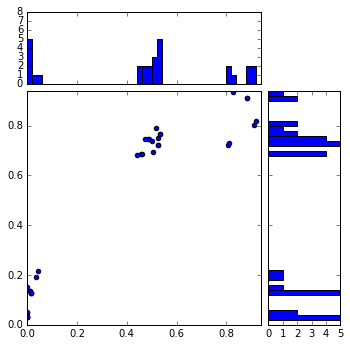

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(5, 5))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.02
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

#axScatter.set_xlim((-lim, lim))
#axScatter.set_ylim((-lim, lim))
axScatter.set_xlim((0, lim))
axScatter.set_ylim((0, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()